<h1>Building a Recommendation System in 10 Steps! Beginner Level</h1>

<h2>Step 1: Load the required packages</h2>

In [34]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

<h2>Step 2: Read your datasets</h2>

The data that we need to develop this recommendation system is coming from two datasets:
-  <b>ratings.csv</b>: This comma delimited file contains information about each user's rating profile
-  <b>movies.csv</b>: This comma delimited file contains information about each movie, including title and genre

Let's start by reading each file separatley and viewing a preview of its content.

In [35]:
#read ratings.csv file
movie_ratings = pd.read_csv('/home/user/dataset/ratings.csv', sep=',')

In [36]:
#let's display the first few lines
movie_ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [37]:
#read movies.csv 
movie_titles = pd.read_csv('/home/user/dataset/movies.csv', sep=',')

#display the first few lines
movie_titles.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<h2>Step 3: Merge your datasets</h2>

Since it is hard to work with movie IDs alone, we need to annotate the movie rating table with movie names. To do so, we can combine the above datasets. Whenever you merge datasets together, you need to find a column in common that can be used to perform the merging. What column do you think is common between the two?

In [39]:
#use the merge function in pandas to merge the two data frames
df = pd.merge(movie_ratings,movie_titles,on='movieId')

#display the first few lines of the combined datasets to make sure that it worked properly
df.head(5)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [40]:
#run the describe function to get an overview of each feature (example: minimum, maximum, range). Why is this useful? hint(outliers)
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


<h2>Step 4: Create Summary Aggregations</h2>

Now that we have one data frame that contains all the information we need to build the recommendation system. We can start playing around with the data to create some aggregations that we can use later in our recommendations. 

<h3>Calculate Average Rating Per Movie</h3>

To calculate the average rating per movie, we need to group the data frame by the <b>title</b> column and run the average function. What happens if we run the average without grouping? Hint (check section <b>3.5.3 Manupilating a Data Frame</b> from yesterday's notebook to help you answer this question)

In [43]:
#calculate the average per title group
df.groupby('title')['rating'].mean()

title
'71 (2014)                                                                                  4.000000
'Hellboy': The Seeds of Creation (2004)                                                     4.000000
'Round Midnight (1986)                                                                      3.500000
'Salem's Lot (2004)                                                                         5.000000
'Til There Was You (1997)                                                                   4.000000
'Tis the Season for Love (2015)                                                             1.500000
'burbs, The (1989)                                                                          3.176471
'night Mother (1986)                                                                        3.000000
(500) Days of Summer (2009)                                                                 3.666667
*batteries not included (1987)                                                       

In [44]:
#let's save the above in a new data frame and call it 'ratings'
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

#display the first few lines. Doesn't it look neater?
ratings.head(5)

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


<h3>Calculate Number of Ratings Per Movie</h3>

In addition to finding the average rating per movie, we are also interested in finding out how many users rated each movie. This will be useful later if we want to maybe remove movies that have a very small number of ratings. We can't learn a lot from movies with very few ratings, therefore we sometimes remove them to avoid false recommendations. 

We can calculate the number of ratings per movie the same way we calculate the average, except now we use the <b>count</b> function. Hint (check section <b>3.5.3 Manupilating a Data Frame</b> from yesterday's notebook to help you answer this question)

In [45]:
#calculate the count of ratings per movie
df.groupby('title')['rating'].count()


title
'71 (2014)                                                                                   1
'Hellboy': The Seeds of Creation (2004)                                                      1
'Round Midnight (1986)                                                                       2
'Salem's Lot (2004)                                                                          1
'Til There Was You (1997)                                                                    2
'Tis the Season for Love (2015)                                                              1
'burbs, The (1989)                                                                          17
'night Mother (1986)                                                                         1
(500) Days of Summer (2009)                                                                 42
*batteries not included (1987)                                                               7
...All the Marbles (1981)                   

In [46]:
#let's add the above information as a column to 'ratings' data frame and call this column 'number_of_ratings'
ratings['number_of_ratings'] = df.groupby('title')['rating'].count()

#display the first few lines of ratings (you should be able to see the new column we just added)
ratings.head(5)

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


<h3>Sort 'Ratings' Data Frame by The Number of Ratings</h3>

In [48]:
#What movie had the highest number of ratings?
ratings.sort_values('number_of_ratings', ascending=False).head(13)


,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


<h2>Step 5: Visualize Your Data</h2>

Generating data summary statistics sometimes is not enough on its own. It is always recommended that you visualize you data to find out what its distribution looks like. Let's start by generating a simple histogram.

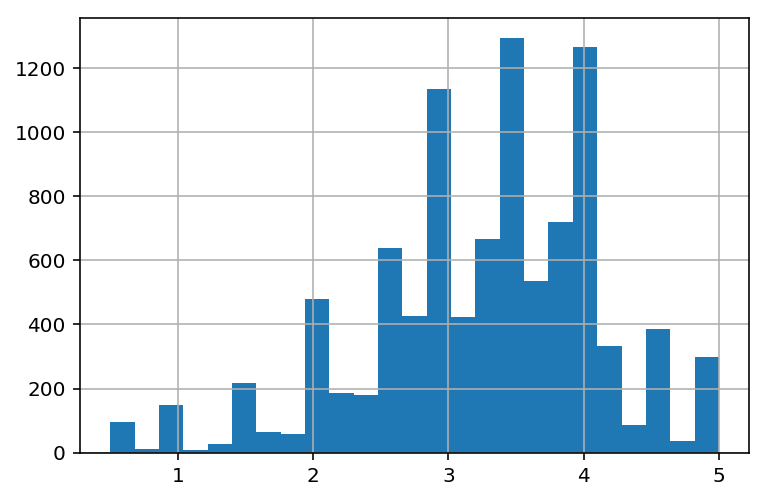

In [0]:
#load the plotting packages 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#generate a histogram for rating variable in ratings dataframe. How many bins should we use?
ratings['rating'].hist(bins=25)

#generate a histogram for the number_of_ratings variable in ratings data frame. How many bins should we use?
ratings['number_of_ratings'].hist(bins=25)


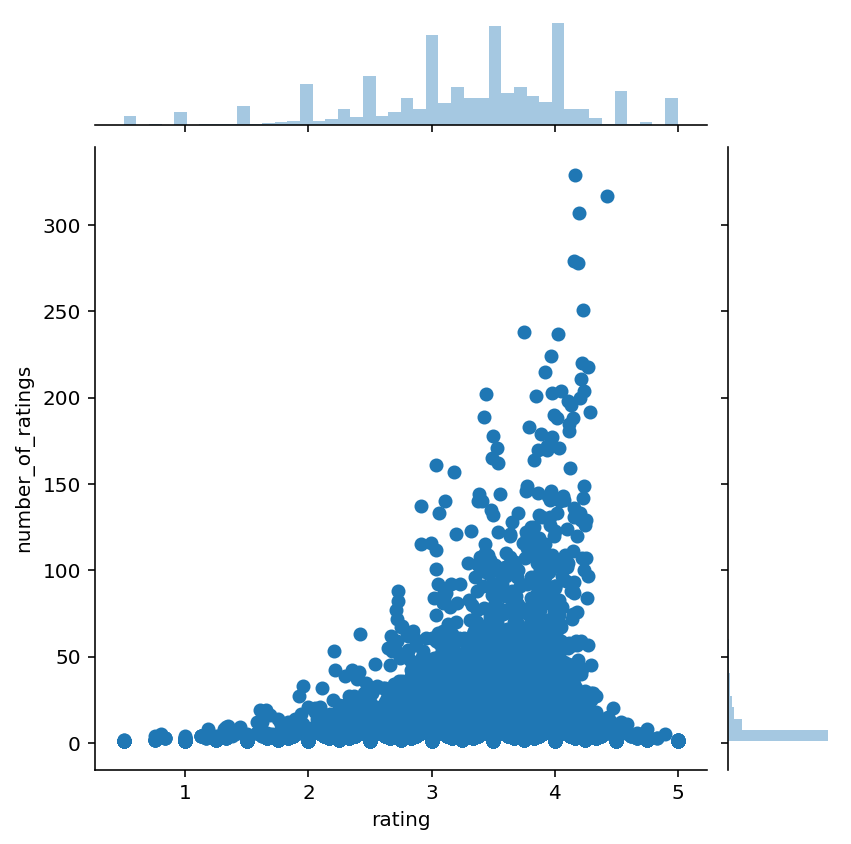

In [63]:
#use seaborn package to generate a scatter plot of rating and number_of_ratings with histograms above
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

<h2>Step 6: Create a Pivot Table</h2>

Python provides a lot of flexibility when it comes to manipulatiung data shapes. For this application, we will need to reshape our data so that each row represents a user and each column represents a movie. One way to do this is by using the <b>`pivot_table`</b> function in pandas data frame. All you need to provide the function is the variable you want use as an index and the variable you want to expand as columns.  

In [120]:
#use the pivot_table function to convert the current df
movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')

#display the first few lines. Notice the NAs, what do they represent?
movie_matrix.head(5)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2>Step 7: Compute Correlations</h2>

We are almost there! We have transformed the data to be in the desired shape. We can now try selecting a movie and assessing the correlation of its rating profile with the rating profiles for all the other movies in the database. 

In [121]:
#let's select the Matrix movie!
input_movie_user_rating = movie_matrix['Matrix, The (1999)']


In [122]:
#display the first few lines
input_movie_user_rating.head()


userId
1    5.0
2    NaN
3    NaN
4    1.0
5    NaN
Name: Matrix, The (1999), dtype: float64

In [123]:
#find the correlation with all other movies
similar_to_input_movie=movie_matrix.corrwith(input_movie_user_rating)


In [124]:
#what does the correlation look like?
similar_to_input_movie.head(100)


title
'71 (2014)                                                     NaN
'Hellboy': The Seeds of Creation (2004)                        NaN
'Round Midnight (1986)                                         NaN
'Salem's Lot (2004)                                            NaN
'Til There Was You (1997)                                      NaN
'Tis the Season for Love (2015)                                NaN
'burbs, The (1989)                                       -0.160843
'night Mother (1986)                                           NaN
(500) Days of Summer (2009)                               0.302316
*batteries not included (1987)                            0.392232
...All the Marbles (1981)                                      NaN
...And Justice for All (1979)                             0.654654
00 Schneider - Jagd auf Nihil Baxter (1994)                    NaN
1-900 (06) (1994)                                              NaN
10 (1979)                                               

<h2>Step 8: Drop Missing Values</h2>

The correlations we generated above has a lot of missing values (NaN). This can be due to low number of data points available to assess the correlation. We need to remove all the missing values since these records are not providing us with information.

In [79]:
#let's first create a data frame called corr_input_movie with the movie title as index and correlation as a column
corr_input_movie = pd.DataFrame(similar_to_input_movie, columns=['correlation'])

#now we can use dropna function to remove all NAs. Can you call the dropna method on the corr_input_movie dataframe? use inplace=True
corr_input_movie.dropna(inplace=True)

#display the first few lines
corr_input_movie.head()

,correlation
title,
"'burbs, The (1989)",-0.160843
(500) Days of Summer (2009),0.302316
*batteries not included (1987),0.392232
...And Justice for All (1979),0.654654
10 Cent Pistol (2015),-1.000000


<h2>Step 9: Filter by Number of Ratings</h2>

The more the ratings, the more confident we have that the recommendation we are making is accurate. In this section, we are going to overlay the number of ratings information per movie with the correlation we have so far. This will make our recommendation a lot better. We have already generated a rating count earlier, so we can just combine it with the correlation data frame. 

In [85]:
corr_input_movie = corr_input_movie.join(ratings['number_of_ratings'])
corr_input_movie.head()


,correlation,number_of_ratings
title,,
"'burbs, The (1989)",-0.160843,17
(500) Days of Summer (2009),0.302316,42
*batteries not included (1987),0.392232,7
...And Justice for All (1979),0.654654,3
10 Cent Pistol (2015),-1.000000,2


<h2>Step 10: Display The Top 10 Recommendations</h2>

In [115]:
#display the top 10 recommendations with number of ratings larger than 100
corr_input_movie[corr_input_movie['number_of_ratings'] > 100 ].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
title,,
"Matrix, The (1999)",1.000000,278
Die Hard (1988),0.544466,145
Inception (2010),0.514767,143
Braveheart (1995),0.496045,237
Aliens (1986),0.470865,126
"Lion King, The (1994)",0.444932,172
"Monsters, Inc. (2001)",0.441205,132
Batman Begins (2005),0.440338,116
Jurassic Park (1993),0.427936,238


In [114]:
print("You might also like")
print(corr_input_movie[corr_input_movie['number_of_ratings'] > 100 ].sort_values(by='correlation', ascending=False).head(10))

You might also like
                       correlation  number_of_ratings
title                                                
Matrix, The (1999)        1.000000                278
Die Hard (1988)           0.544466                145
Inception (2010)          0.514767                143
Braveheart (1995)         0.496045                237
Aliens (1986)             0.470865                126
Lion King, The (1994)     0.444932                172
Monsters, Inc. (2001)     0.441205                132
Batman Begins (2005)      0.440338                116
Jurassic Park (1993)      0.427936                238
Fight Club (1999)         0.417196                218
